<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/demo_ntlk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시소러스(유의어 사전)를 이용한 유사도 평가를 통한 컴퓨터의 단어의 의미 (간접적) 이해


### B.1 NLTK (자연어 처리 및 문서 분석용 파이썬 패키지 설치
* 주요기능 : 말뭉치, 토큰 생성, 형태소 분석, 품사 태깅
* 밑시딥2에서의 이용목적기능: 유사도

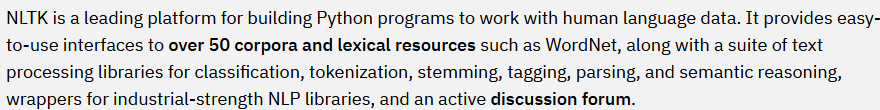

In [ ]:
!pip list | grep nltk

nltk                          3.2.5


### B.2 WordNet에서 동의어 얻기: lemma_names()메서드

In [ ]:
import nltk
from nltk.corpus import wordnet

wordnet.synsets('car')      # 동의어 그룹 얻기 실행 결과, 5개의 동의어그룹 확인
                            # 예: car.n.01 의 의미는 동의어그룹중 car라는 명사의 첫번째임.


[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [ ]:
car = wordnet.synset('car.n.01')    # 동의어그룹 car.n.01를 가져옴
print("type: ", type(car))
car.definition()  

type:  <class 'nltk.corpus.reader.wordnet.Synset'>


'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [ ]:
car.lemma_names()                   # car의 동의어(부명제) 들

['car', 'auto', 'automobile', 'machine', 'motorcar']

### B.3 WordNet과 단어 네트워크 (단어의 의미적 계층적관계): hypernym_paths()

In [ ]:
car.hypernym_paths()[0]            # hypernym: 상의어 

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

In [ ]:
car.hypernym_paths()[1]            # 또 다른 상.하 관계

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('conveyance.n.03'),
 Synset('vehicle.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

### B.4 WordNet을 사용한 의미 유사도: path_similarity(), 0 ~ 1 실수 (유사도) 반환

In [ ]:
from collections import OrderedDict
import pandas as pd
import seaborn as sns
o_dic = OrderedDict()

In [ ]:
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01')

In [ ]:
o_dic['novel'] = car.path_similarity(novel)
o_dic['novel']

0.05555555555555555

In [ ]:
o_dic['dog'] = car.path_similarity(dog)
o_dic['dog']

0.07692307692307693

In [ ]:
o_dic['motorcycle'] = car.path_similarity(motorcycle)
o_dic['motorcycle']


0.3333333333333333

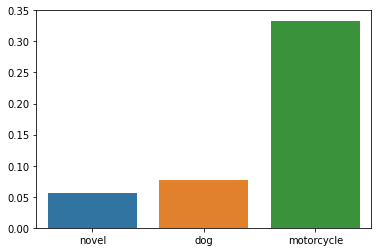

In [ ]:
df = pd.DataFrame(data=o_dic, index=[0])
sns.barplot(data=df)

### ■ 단어 네트워크를 이용한 car와의 유사도 순위: motorcycle > dog > novel

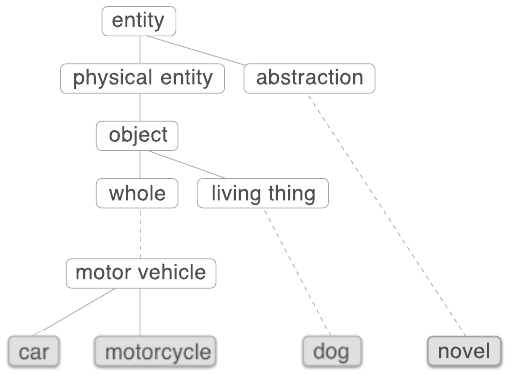

### 기타 유사도2: Leacock-Chodorow (LCH)

In [ ]:
o_dic['novel'] = car.lch_similarity(novel)
o_dic['novel']

0.7472144018302211

In [ ]:
o_dic['dog'] = car.lch_similarity(dog)
o_dic['dog']

1.072636802264849

In [ ]:
o_dic['motorcycle'] = car.lch_similarity(motorcycle)
o_dic['motorcycle']

2.538973871058276

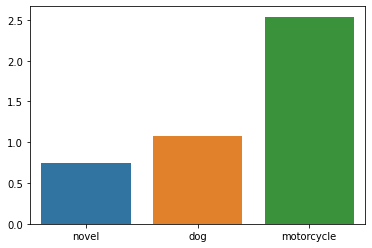

In [ ]:
df = pd.DataFrame(data=o_dic, index=[0])
sns.barplot(data=df)

### 기타 유사도 3: Wu-Palmer

In [ ]:
o_dic['novel'] = car.wup_similarity(novel)
o_dic['novel']

0.10526315789473684

In [ ]:
o_dic['dog'] = car.wup_similarity(dog)
o_dic['dog']

0.4

In [ ]:
o_dic['motorcycle'] = car.wup_similarity(motorcycle)
o_dic['motorcycle']

0.9166666666666666

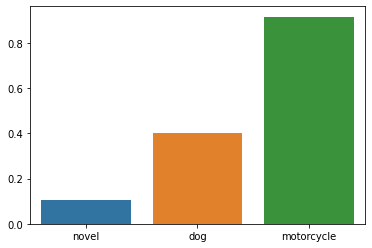

In [ ]:
df = pd.DataFrame(data=o_dic, index=[0])
sns.barplot(data=df)

# 주요기능: 말뭉치 
* 사례1 (저작권 말소된 문학작품)

In [ ]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

* 사례2 (영어 남자 이름)

In [ ]:
male_raw = nltk.corpus.names.raw("male.txt")
print(len(male_raw))
male_raw

20293


'Aamir\nAaron\nAbbey\nAbbie\nAbbot\nAbbott\nAbby\nAbdel\nAbdul\nAbdulkarim\nAbdullah\nAbe\nAbel\nAbelard\nAbner\nAbraham\nAbram\nAce\nAdair\nAdam\nAdams\nAddie\nAdger\nAditya\nAdlai\nAdnan\nAdolf\nAdolfo\nAdolph\nAdolphe\nAdolpho\nAdolphus\nAdrian\nAdrick\nAdrien\nAgamemnon\nAguinaldo\nAguste\nAgustin\nAharon\nAhmad\nAhmed\nAhmet\nAjai\nAjay\nAl\nAlaa\nAlain\nAlan\nAlasdair\nAlastair\nAlbatros\nAlbert\nAlberto\nAlbrecht\nAlden\nAldis\nAldo\nAldric\nAldrich\nAldus\nAldwin\nAlec\nAleck\nAlejandro\nAleks\nAleksandrs\nAlessandro\nAlex\nAlexander\nAlexei\nAlexis\nAlf\nAlfie\nAlfonse\nAlfonso\nAlfonzo\nAlford\nAlfred\nAlfredo\nAlgernon\nAli\nAlic\nAlister\nAlix\nAllah\nAllan\nAllen\nAlley\nAllie\nAllin\nAllyn\nAlonso\nAlonzo\nAloysius\nAlphonse\nAlphonso\nAlston\nAlton\nAlvin\nAlwin\nAmadeus\nAmbros\nAmbrose\nAmbrosi\nAmbrosio\nAmbrosius\nAmery\nAmory\nAmos\nAnatol\nAnatole\nAnatollo\nAnatoly\nAnders\nAndie\nAndonis\nAndre\nAndrea\nAndreas\nAndrej\nAndres\nAndrew\nAndrey\nAndri\nAndros\nAndr

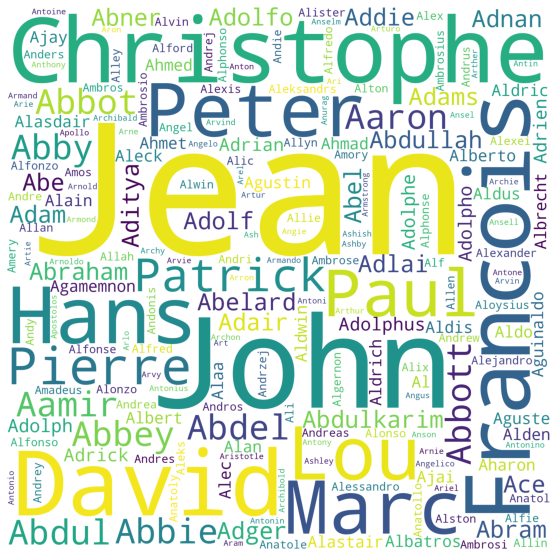

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist                                     # 사용빈도 메서드
from matplotlib import pyplot as plt
from wordcloud import WordCloud

retokenize = RegexpTokenizer("[\w]+")
male_list = retokenize.tokenize(male_raw)
fd_names = FreqDist(male_list)

fig, ax = plt.subplots(figsize=(18, 10))
wc = WordCloud(width=2000, height=2000, background_color="white", random_state=0)
ax.imshow(wc.generate_from_frequencies(fd_names))
ax.axis("off")
plt.show()

# 주요기능: 토근 생성 (tokenize)

In [ ]:
emma_raw[:1302]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

In [ ]:
emma_list = retokenize.tokenize(emma_raw[:1302])

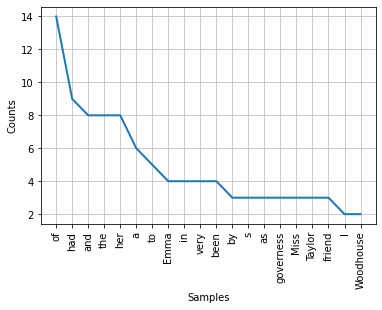

In [ ]:
from nltk import Text
text = Text(emma_list)
text.plot(20)

# 주요기능: 품사 부착

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

# 기타 주요기능: 형태소 분석, Syntactic Parsing, etc.